## 1.numpy图像数组的显示问题

In [99]:
import torch
from torch import nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

(28, 28, 3)


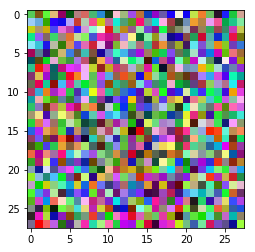

In [100]:
img = np.random.rand(28,28,3)
img = (img - img.min()) / (img.max()-img.min())   # 将原始缩放到 [0,1]
# print(img)
print(img.shape)
plt.imshow(img,cmap='gray')

(28, 28)


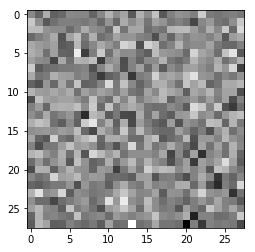

In [101]:
img = np.random.randn(28,28)
img = (img - img.min()) / (img.max()-img.min())   # 将原始缩放到 [0,1]
# print(img)
print(img.shape)
plt.imshow(img,cmap='gray')

**总结：**
1. 待显示图像的范围一定要在[0,1]内
2. 显示3通道的图像，即使设置`cmap='gray'`，仍然会显示彩色图像
3. 显示灰度图像，只能使用二维的数据，即(H,W)，如果使用三维数据(H,W,1)会报错

In [119]:
x = torch.randn(5,4)         # 注意标准正态分布，是 N(0,1)，但根据3sigma原则，范围大致在(-3,3)内
y = torch.randn(5,4)
scale = lambda x: (x-x.min())/(x.max()-x.min())
x, y = map(scale, [x,y])
# print(x.max(), y.min())
loss = nn.BCELoss()(x, y)
loss2 = F.binary_cross_entropy(x,y)
print(loss.data.item(), loss2.data.item())

0.9388154149055481 0.9388154149055481


In [73]:
x = np.random.randn(3,4)
print(x)
print()
print(np.max(x, 0))
print()
print(x -np.max(x, 0))

[[-0.88985972 -0.11993736  0.0272243   0.42961925]
 [-1.84090353 -1.88243286  0.15668893 -0.1110186 ]
 [-0.60489633 -1.18595555 -0.36380515 -0.96873687]]

[-0.60489633 -0.11993736  0.15668893  0.42961925]

[[-0.28496339  0.         -0.12946463  0.        ]
 [-1.2360072  -1.7624955   0.         -0.54063785]
 [ 0.         -1.06601819 -0.52049409 -1.39835612]]


In [124]:
import torchvision.utils as t
print(dir(t))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'irange', 'make_grid', 'math', 'save_image', 'torch']
